######The cell above loads the visual style of the notebook when run.

In [1]:
from IPython.core.display import HTML
css_file = '../styles.css'
HTML(open(css_file, "r").read())

#Creating Functions 

<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span>Learning Objectives</h2>
</div>
</section>

> *   Define a function that takes parameters.
> *   Return a value from a function.
> *   Set default values for function parameters.
> *   Explain why we should divide programs into small, single-purpose functions.

At this point, we've written code to draw some interesting features in our star data, loop over all our data files to quickly draw these plots for each of them, and have Python make decisions based on what it sees in our data.

But our code is getting pretty long and complicated; what if we had thousands of datasets, and didn't want to generate a figure for every single one? Commenting out the figure-drawing code is a nuisance.

Also, what if we want to use that code again, on a different dataset or at a different point in our program? Cutting and pasting it is going to make our code get very long and very repetative, very quickly.

We'd like a way to package our code so that it is easier to reuse,
and Python provides for this by letting us define things called 'functions' - a shorthand way of re-executing longer pieces of code.

Let's start by defining a function `fahr_to_kelvin` that converts temperatures from Fahrenheit to Kelvin:

In [2]:
def fahr_to_kelvin(temp):
    return ((temp - 32) * (5/9)) + 273.15

The function definition opens with the word `def`, which is followed by the name of the function and a parenthesized list of parameter names.
The [body](reference.html#function-body) of the function - the
statements that are executed when it runs - is indented below the definition line, typically by four spaces.

When we call the function, the values we pass to it are assigned to those variables so that we can use them inside the function. Inside the function, we use a [return statement](reference.html#return-statement) to send a result back to whoever asked for it.

Let's try running our function. Calling our own function is no different from calling any other function:

In [3]:
print ('freezing point of water:', fahr_to_kelvin(32) )
print ('boiling point of water:', fahr_to_kelvin(212) )

freezing point of water: 273.15
boiling point of water: 373.15


## Composing Functions

Now that we've seen how to turn Fahrenheit into Kelvin, it's easy to turn Kelvin into Celsius:


In [4]:
def kelvin_to_celsius(temp):
    return temp - 273.15

print( 'absolute zero in Celsius:', kelvin_to_celsius(0.0) )

absolute zero in Celsius: -273.15


What about converting Fahrenheit to Celsius? We could write out the formula, but we don't need to. Instead, we can [compose](reference.html#function-composition) the two functions we have already created:

In [5]:
def fahr_to_celsius(temp):
    temp_k = fahr_to_kelvin(temp)
    result = kelvin_to_celsius(temp_k)
    return result

In [6]:
print( 'freezing point of water in Celsius:', fahr_to_celsius(32.0) )

freezing point of water in Celsius: 0.0


This is our first taste of how larger programs are built:
we define basic operations,
then combine them in ever-large chunks to get the effect we want.
Real-life functions will usually be larger than the ones shown here - typically half a dozen to a few dozen lines - but
they shouldn't ever be much longer than that,
or the next person who reads it won't be able to understand what's going on.

## Tidying up

Now that we know how to wrap bits of code up in functions,
we can make our star brightness analyasis easier to read and easier to reuse. First, let's make an `process` function that takes our data and processes it to remove the cloud-induced variability:

In [7]:
def process(filename):
    data = numpy.loadtxt(fname=filename, delimiter=',') 
    ave_brightness = data.mean(axis=0)
    processed_data = data / ave_brightness
    return processed_data

and another function that produces a plot of the processed data

In [8]:
def plot(processed_data):
    image  = matplotlib.pyplot.imshow(processed_data) 
    matplotlib.pyplot.show(image) 

and one more that checks for variable stars.

In [9]:
def detect_variables(processed_data):
    # standard deviation of each star
    deviations = processed_data.std(axis=1)
    
    mean_deviation = deviations.mean()
    std_deviations = deviations.std()
    for star_deviation in deviations:
        if (star_deviation - mean_deviation > 3.0*std_deviations):
            print('variable star in this data')

Notice that rather than jumbling this code together in one giant `for` loop, we can now read and reuse both ideas separately.
We can reproduce the previous analysis with a much simpler `for` loop:

data/star_data_01.csv


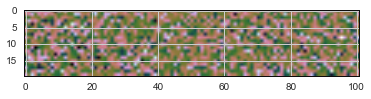

data/star_data_02.csv


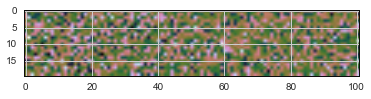

data/star_data_03.csv


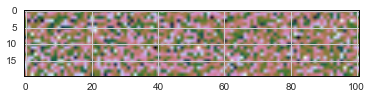

data/star_data_04.csv


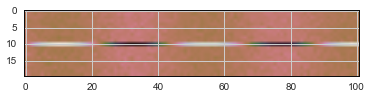

variable star in this data
data/star_data_05.csv


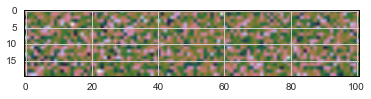

data/star_data_06.csv


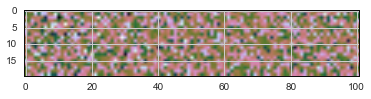

data/star_data_07.csv


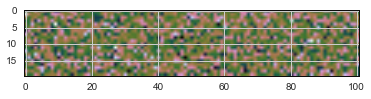

data/star_data_08.csv


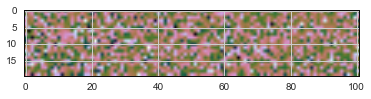

data/star_data_09.csv


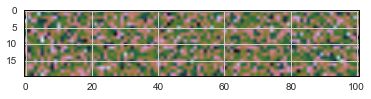

data/star_data_10.csv


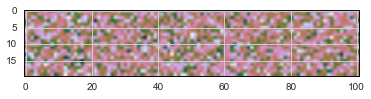

data/star_data_11.csv


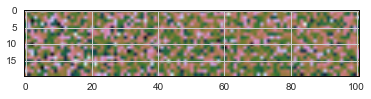

data/star_data_12.csv


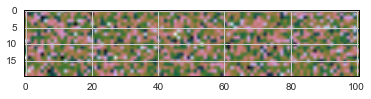

In [10]:
import numpy
import matplotlib.pyplot
import glob
%matplotlib inline

filenames = glob.glob('data/*.csv')
for f in filenames:
    print(f)
    processed_data = process(f)
    plot(processed_data)
    detect_variables(processed_data)

By giving our functions human-readable names, we can more easily read and understand what is happening in the `for` loop. Even better, if at some later date we want to use either of those pieces of code again,
we can do so in a single line.

## Testing and Documenting

Once we start putting things in functions so that we can re-use them,
we need to start testing that those functions are working correctly.
To see how to do this,
let's write a function to center a dataset around a particular value:

In [11]:
def center(data, desired):
    return (data - data.mean()) + desired

We could test this on our actual data, but since we don't know what the values ought to be, it will be hard to tell if the result was correct.
Instead, let's use NumPy to create a matrix of 0's and then center that around 3:

In [12]:
z = numpy.zeros((2,2))
print ( center(z,3) )

[[ 3.  3.]
 [ 3.  3.]]


That looks right,
so let's try `center` on our real data:

In [13]:
data = numpy.loadtxt(fname='data/star_data_01.csv', delimiter=',')
print ( center(data, 0) )

[[-3.6718427  -3.81570581 -4.13173512 ...,  0.2458925  -0.90905404
   0.44061367]
 [-4.05148132 -3.47573063 -2.45566153 ...,  0.73122172 -0.87609992
   1.22656046]
 [-4.90548289 -4.63515785 -3.45843892 ..., -0.84650214  0.08481151
   0.2557072 ]
 ..., 
 [-3.35356354 -4.94257997 -4.77925868 ...,  0.58308457  0.75383582
   0.04129991]
 [-4.58199832 -4.98773945 -3.27734984 ..., -0.09449615 -0.29142883
   1.1928766 ]
 [-3.50721851 -4.32961005 -2.06341214 ...,  1.32277885  0.30183067
   0.63087012]]


It's hard to tell from the default output whether the result is correct,
but there are a few simple tests that will reassure us:

In [14]:
print ('original min, mean, and max are:', data.min(), data.mean(), data.max())
centered = center(data, 0)
print ('min, mean, and and max of centered data are:', centered.min(), centered.mean(), centered.max())

original min, mean, and max are: 16.4477700722 22.5002003719 26.9747210312
min, mean, and and max of centered data are: -6.0524302997 -1.07284918023e-15 4.47452065932


That seems right. The mean of the centered data isn't quite zero - we'll explore why not in the challenges - but it's pretty close.

We can even go further and check that the standard deviation hasn't changed:

In [15]:
print ('std dev before and after:', data.std(), centered.std())

std dev before and after: 1.71095670561 1.71095670561


It looks like our function works. It's still possible that our function is wrong,
but it seems unlikely enough that we should probably get back to doing our analysis.
We have one more task first, though: we should write some [documentation](reference.html#documentation) for our function to remind ourselves later what it's for and how to use it.

The usual way to put documentation in software is to add [comments](reference.html#comment) like this:

In [16]:
# return a new array containing the original data centered around the desired value.
def center(data, desired):
    return (data - data.mean()) + desired

There's a better way, though.
If the first thing in a function is a string that isn't assigned to a variable,
that string is attached to the function as its documentation:

In [17]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.'''
    return (data - data.mean()) + desired

This is better because we can now ask Python's built-in help system to show us the documentation for the function:

In [18]:
help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.



A string like this is called a [docstring](reference.html#docstring).
We don't need to use triple quotes when we write one,
but if we do,
we can break the string across multiple lines:

In [19]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - data.mean()) + desired

help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]



## Defining Defaults

We have passed parameters to functions in two ways: directly, as in `center(data)`, and by name, as in `numpy.loadtxt(fname='something.csv', delimiter=',')`.

In fact, we can pass the filename to `loadtxt` without the `fname=`:

```python
numpy.loadtxt('inflammation-01.csv', delimiter=',')
```

but we still need to say `delimiter=`:

In [20]:
numpy.loadtxt('data/star_data_01.csv', ',')

TypeError: data type "," not understood

To understand what's going on, and make our own functions easier to use, let's re-define our `center` function like this:

In [21]:
def center(data, desired=0.0):
    '''Return a new array containing the original data centered around the desired value (0 by default).
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - data.mean()) + desired

The key change is that the second parameter is now written `desired=0.0` instead of just `desired`.
If we call the function with two arguments,
it works as it did before:
 

In [22]:
test_data = numpy.zeros((2, 2))
print (center(test_data, 3))

[[ 3.  3.]
 [ 3.  3.]]


But we can also now call it with just one parameter,
in which case `desired` is automatically assigned the [default value](reference.html#default-value) of 0.0:

more_data = 5 + numpy.zeros((2, 2))
print ('data before centering:')
print (more_data)
print ('centered data:')
print (center(more_data))
 

This is handy: if we usually want a function to work one way, but occasionally need it to do something else, we can allow people to pass a parameter when they need to but provide a default to make the normal case easier.

The example below shows how Python matches values to parameters:

In [23]:
def display(a=1, b=2, c=3):
    print ('a:', a, 'b:', b, 'c:', c)

print ('no parameters:')
display()
print ('one parameter:')
display(55)
print ('two parameters:')
display(55, 66)

no parameters:
a: 1 b: 2 c: 3
one parameter:
a: 55 b: 2 c: 3
two parameters:
a: 55 b: 66 c: 3


As this example shows,
parameters are matched up from left to right,
and any that haven't been given a value explicitly get their default value.
We can override this behavior by naming the value as we pass it in:

In [24]:
print ('only setting the value of c')
display(c=77)

only setting the value of c
a: 1 b: 2 c: 77


With that in hand,
let's look at the help for `numpy.loadtxt`:

In [25]:
help(numpy.loadtxt)

Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file or str
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        record data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str, optional
        The character used to indicate the start of a comment;


There's a lot of information here,
but the most important part is the first couple of lines:

```python
loadtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None,
        unpack=False, ndmin=0)
```

This tells us that `loadtxt` has one parameter called `fname` that doesn't have a default value,
and eight others that do.
If we call the function like this:

```python
numpy.loadtxt('data/star_data_01.csv', ',')
```

then the filename is assigned to `fname` (which is what we want),
but the delimiter string `','` is assigned to `dtype` rather than `delimiter`,
because `dtype` is the second parameter in the list. However ',' isn't a known `dtype` so
our code produced an error message when we tried to run it.
When we call `loadtxt` we don't have to provide `fname=` for the filename because it's the
first item in the list, but if we want the ',' to be assigned to the variable `delimiter`,
we *do* have to provide `delimiter=` for the second parameter since `delimiter` is not
the second parameter in the list.
 

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Combining Strings</h2>
</div>
</section>

> "Adding" two strings produces their concatenation:
> `'a' + 'b'` is `'ab'`.
> Write a function called `fence` that takes two parameters called `original` and `wrapper`
> and returns a new string that has the wrapper character at the beginning and end of the original.
> A call to your function should look like this:
>
> ```python
> print (fence('name', '*'))
> *name*
> ```

In [26]:
# Write your own code here

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Selecting characters from strings</h2>
</div>
</section>

> If the variable `s` refers to a string,
> then `s[0]` is the string's first character
> and `s[-1]` is its last.
> Write a function called `outer`
> that returns a string made up of just the first and last characters of its input.
> A call to your function should look like this:
>
> ```python
> print ( outer('helium') )
> hm
> ```

In [27]:
# Write your own code here

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Rescaling an array</h2>
</div>
</section>

> Write a function `rescale` that takes an array as input
> and returns a corresponding array of values scaled to lie in the range 0.0 to 1.0.
> (Hint: If $L$ and $H$ are the lowest and highest values in the original array,
> then the replacement for a value $v$ should be $(v-L) / (H-L)$.)

In [28]:
# Write your own code here

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Testing and documenting</h2>
</div>
</section>

> Run the commands `help(numpy.arange)` and `help(numpy.linspace)`
> to see how to use these functions to generate regularly-spaced values,
> then use those values to test your `rescale` function.
> Once you've successfully tested your function,
> add a docstring that explains what it does.

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Defining defaults</h2>
</div>
</section>

> Rewrite the `rescale` function so that it scales data to lie between 0.0 and 1.0 by default,
> but will allow the caller to specify lower and upper bounds if they want.
> Compare your implementation to your neighbour's:
> do the two functions always behave the same way?


<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Variables inside and outside functions </h2>
</div>
</section>

> What does the following piece of code display when run - and why?

> For discussion and understanding, the following two examples at http://pythontutor.com may be illuminating


> [example1](http://www.pythontutor.com/visualize.html#code=f+%3D+0%0Ak+%3D+0%0A%0Adef+f2k(f%29%3A%0A++++k+%3D+((f-32%29*(5.0/9.0%29%29+%2B+273.15%0A++++return+k%0A%0Af2k(8%29%0Af2k(41%29%0Af2k(32%29%0A%0Aprint+(k%29&mode=display&origin=opt-frontend.js&cumulative=false&heapPrimitives=false&textReferences=false&py=3&rawInputLstJSON=%5B%5D&curInstr=0)

> [example2](http://www.pythontutor.com/visualize.html#code=def+fahr_to_kelvin(temp%29%3A%0A++++return+((temp+-+32%29+*+(5/9%29%29+%2B+273.15%0A++++%0Adef+kelvin_to_celsius(temp%29%3A%0A++++return+temp+-+273.15%0A++++%0Adef+fahr_to_celsius(temp%29%3A%0A++++temp_k+%3D+fahr_to_kelvin(temp%29%0A++++result+%3D+kelvin_to_celsius(temp_k%29%0A++++return+result%0A++++%0Aoriginal+%3D+32.0%0Afinal+%3D+fahr_to_celsius(original%29&mode=display&origin=opt-frontend.js&cumulative=false&heapPrimitives=false&textReferences=false&py=3&rawInputLstJSON=%5B%5D&curInstr=0 )



In [29]:
f = 0
k = 0

def f2k(f):
    k = ((f-32)*(5.0/9.0)) + 273.15
    return k

f2k(8)
f2k(41)
f2k(32)

print (k)

0
